In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix


In [ ]:
data = pd.read_excel('Data2020_3.xlsx')
data.head()

,Unnamed: 0,A_AGE,A_HGA,A_MARITL,A_FAMREL,A_SEX,P_STAT,PECERT1,PECERT2,PECERT3,A_HRSPAY,A_HRLYWK,A_WKSTAT,CLWK,EARNER,PHMEMPRS,ERN_SRCE,CAP_VAL,WSAL_YN,FILESTAT,TAX_INC,A_CLSWKR,A_FAMREL.1,PRDTRACE,A_SEX.1,CAP_VAL.1,A_USLHRS,PRCITSHP,PTOT_R
0,0,63,39,1,1,2,1,2,-1,-1,-1,0,2,2,1,3,1,0,1,2,98944,3,1,1,2,0,40,1,22
1,1,67,39,1,2,1,1,2,-1,-1,-1,0,1,2,1,1,1,0,1,2,0,0,2,1,1,0,-1,1,30
2,2,64,39,1,1,1,1,2,-1,-1,-1,2,2,2,1,3,1,0,1,2,14589,4,1,1,1,0,48,1,18
3,3,71,36,1,2,2,1,2,-1,-1,-1,0,1,5,2,0,0,0,2,2,0,0,2,1,2,0,-1,1,9
4,4,54,39,5,0,2,1,2,-1,-1,-1,0,2,1,1,1,1,0,1,5,24720,1,0,1,2,0,44,1,17


In [ ]:
data1 = data.copy()

In [ ]:
data1['PTOT_R'] = np.where(np.logical_and(data1['PTOT_R'] >=0,data1['PTOT_R'] <8) , 1, data1['PTOT_R'])
data1['PTOT_R'] = np.where(np.logical_and(data1['PTOT_R'] >=8,data1['PTOT_R'] <33) , 2, data1['PTOT_R'])
data1['PTOT_R'] = np.where(data1['PTOT_R'] >=33, 3, data1['PTOT_R'])

In [ ]:
data1['A_AGE'] = np.where(data1['A_AGE'] < 18 , 1, data1['A_AGE'])
data1['A_AGE'] = np.where(np.logical_and(data1['A_AGE'] >= 18,data1['A_AGE']<30),2,data1['A_AGE'])
data1['A_AGE'] = np.where(np.logical_and(data1['A_AGE'] >= 30,data1['A_AGE']<50),3,data1['A_AGE'])
data1['A_AGE'] = np.where(data1['A_AGE'] >= 50,4,data1['A_AGE'])

In [ ]:
data1['A_HGA'] = np.where(data1['A_HGA'] > 0, data1['A_HGA']-30, data1['A_HGA'])

In [ ]:
data1['A_HRSPAY'] = np.where(data1['A_HRSPAY'] > 0 ,data1['A_HRSPAY']/100 , data1['A_HRSPAY'])
data1['A_HRSPAY'] = np.where(data1['A_HRSPAY'] < 0 ,0 , data1['A_HRSPAY'])

In [ ]:
data1['PECERT1'] = np.where(data1['PECERT1'] < 0 ,0 , data1['PECERT1'])
data1['PECERT2'] = np.where(data1['PECERT2'] < 0 ,0 , data1['PECERT2'])
data1['PECERT3'] = np.where(data1['PECERT3'] < 0 ,0 , data1['PECERT3'])

In [ ]:
data1['A_USLHRS'] = np.where(data1['A_USLHRS'] == -4 , 20 , data1['A_USLHRS'])
data1['A_USLHRS'] = np.where(data1['A_USLHRS'] == -1 , 0 , data1['A_USLHRS'])

In [ ]:
data1 = data1.drop('Unnamed: 0',axis=1)

In [ ]:
X = data1.loc[:, data1.columns != 'PTOT_R']
y = data1.loc[:, data1.columns == 'PTOT_R']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
classifier = RandomForestClassifier(n_estimators = 34, criterion = 'entropy', random_state = 42)
rfe = RFE(classifier, n_features_to_select=10)
rfe = rfe.fit(X_train, y_train.values.ravel())

In [ ]:
print(rfe.support_)
print(rfe.ranking_)
X = data1.loc[:, data1.columns != 'PTOT_R']
y = data1.loc[:, data1.columns == 'PTOT_R']
cols = X.columns
new_cols = []
for i,j in enumerate(rfe.ranking_):
  if(j<7):
    new_cols.append(cols[i])
  else:
    print(cols[i])
X = X[new_cols]
print(X)
print(new_cols)

[ True  True  True  True False False False False False False False False
 False False  True  True False False  True  True  True False False False
 False  True False]
[ 1  1  1  1  4 18 15  8 16 14  9  2 10 11  1  1  7 17  1  1  1  3  5 12
 13  1  6]
P_STAT
PECERT1
PECERT2
PECERT3
A_HRSPAY
A_HRLYWK
CLWK
EARNER
CAP_VAL
WSAL_YN
A_SEX.1
CAP_VAL.1
       A_AGE  A_HGA  A_MARITL  ...  PRDTRACE  A_USLHRS  PRCITSHP
0          4      9         1  ...         1        40         1
1          4      9         1  ...         1         0         1
2          4      9         1  ...         1        48         1
3          4      6         1  ...         1         0         1
4          4      9         5  ...         1        44         1
...      ...    ...       ...  ...       ...       ...       ...
79995      4     14         1  ...         1        45         1
79996      3     13         1  ...         1        38         1
79997      1      0         7  ...         1         0         1
79998

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
arr = []
for i in range(1,50):
  classifier = RandomForestClassifier(n_estimators = i, criterion = 'entropy', random_state = 42)
  classifier.fit(X_train, y_train)
  y_pred = classifier.predict(X_test)
  res = accuracy_score(y_test,y_pred)
  print("Accuracy for ",i,"is",res)
  arr.append(res)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


Accuracy for  1 is 0.8160625
Accuracy for  2 is 0.815125


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


Accuracy for  3 is 0.8245625


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


Accuracy for  4 is 0.829875


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


Accuracy for  5 is 0.83125


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


Accuracy for  6 is 0.8335625


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


Accuracy for  7 is 0.8343125


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


Accuracy for  8 is 0.8353125


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


Accuracy for  9 is 0.835625


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


Accuracy for  10 is 0.8353125


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


Accuracy for  11 is 0.836625


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


Accuracy for  12 is 0.8378125


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


Accuracy for  13 is 0.8374375


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


Accuracy for  14 is 0.83825


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


Accuracy for  15 is 0.83825


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


Accuracy for  16 is 0.838625


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


Accuracy for  17 is 0.83825


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


Accuracy for  18 is 0.8393125


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


Accuracy for  19 is 0.83875


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


Accuracy for  20 is 0.840125


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


Accuracy for  21 is 0.8393125


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


Accuracy for  22 is 0.84125


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


Accuracy for  23 is 0.8420625


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


Accuracy for  24 is 0.8420625


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


Accuracy for  25 is 0.8424375


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


Accuracy for  26 is 0.842375


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


Accuracy for  27 is 0.84275


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


Accuracy for  28 is 0.8416875


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


Accuracy for  29 is 0.8428125


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


Accuracy for  30 is 0.8420625


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


Accuracy for  31 is 0.842125


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


Accuracy for  32 is 0.8429375


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


Accuracy for  33 is 0.8424375


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


Accuracy for  34 is 0.8429375


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


Accuracy for  35 is 0.8426875


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


Accuracy for  36 is 0.8424375


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


Accuracy for  37 is 0.8420625


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


Accuracy for  38 is 0.8425


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


Accuracy for  39 is 0.842375


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


Accuracy for  40 is 0.842875


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


Accuracy for  41 is 0.842125


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


Accuracy for  42 is 0.8431875


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


Accuracy for  43 is 0.8426875


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


Accuracy for  44 is 0.8426875


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


Accuracy for  45 is 0.8428125


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


Accuracy for  46 is 0.843


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


Accuracy for  47 is 0.842125


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


Accuracy for  48 is 0.8424375


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


Accuracy for  49 is 0.84225


Text(0, 0.5, 'Accuracy')

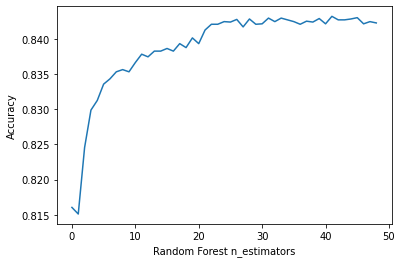

In [ ]:
import matplotlib.pyplot as plt

plt.plot(arr)
plt.xlabel("Random Forest n_estimators")
plt.ylabel("Accuracy")